In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score


In [17]:
df = pd.read_csv('heart.csv')
df.dropna(subset=['target'], inplace=True)

In [18]:

categorical_cols = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype == 'object']

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float']).columns.tolist()

# Remove the target column if it exists
if 'target' in numerical_cols:
    numerical_cols.remove('target')

# Combine scaled numerical and categorical columns
my_cols = categorical_cols + numerical_cols
X = df[my_cols]
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[
    'imputer',SimpleImputer(strategy='mean'),
    'scaler',StandardScaler()
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessing =ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)





In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0.87710438 0.90740741 0.9047619  0.93531469 0.92307692]


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_scores = cross_val_predict(model,X_train,y_train, cv=5, method='predict_proba')
y_scores_positive = y_scores[:,1]
tpr,fpr, threshold = roc_curve(y_train,y_scores_positive)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


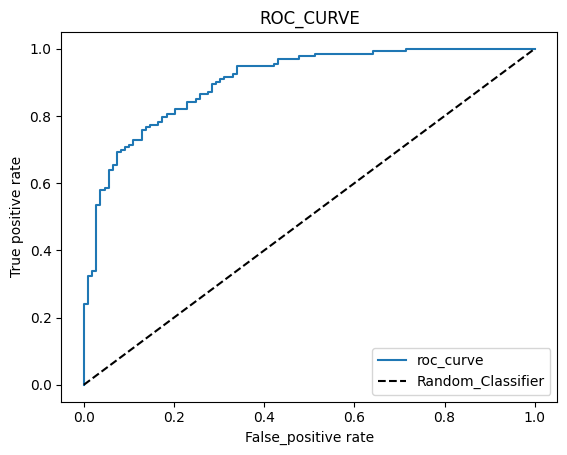

In [ ]:
plt.plot(tpr, fpr, label="roc_curve")
plt.plot([0,1], [0,1], 'k--', label='Random_Classifier')
plt.xlabel('False_positive rate')
plt.ylabel('True positive rate')
plt.title('ROC_CURVE')
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_train, y_scores_positive)

np.float64(0.900151755535628)